In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
import pandas as pd
import tensorflow as tf

In [3]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Desktop/Charity/Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'])


app_type_counts = application_df['APPLICATION_TYPE'].value_counts()
replace_application = app_type_counts[app_type_counts < 500].index

for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")

classification_counts = application_df.CLASSIFICATION.value_counts()
replace_class = classification_counts[classification_counts < 1500].index

for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")

# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(columns=application_cat)
application_df.head()

C:\Users\amhal\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop('IS_SUCCESSFUL', 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

C:\Users\amhal\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=43))

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=80, activation='relu'))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 10,081
Trainable params: 10,081
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the model
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
# Train the model
fit_model = nn_1.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 6s 5ms/step - loss: 0.5698 - accuracy: 0.7210
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5566 - accuracy: 0.7285
Epoch 3/100
804/804 [==============================] - 6s 8ms/step - loss: 0.5538 - accuracy: 0.7296
Epoch 4/100
804/804 [==============================] - 4s 6ms/step - loss: 0.5517 - accuracy: 0.7310
Epoch 5/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5501 - accuracy: 0.7320
Epoch 6/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5496 - accuracy: 0.7323
Epoch 7/100
804/804 [==============================] - 6s 7ms/step - loss: 0.5485 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5469 - accuracy: 0.7336
Epoch 9/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5466 - accuracy: 0.7338
Epoch 10/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5464 - accura

804/804 [==============================] - 4s 5ms/step - loss: 0.5355 - accuracy: 0.7395
Epoch 82/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5350 - accuracy: 0.7397
Epoch 83/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5355 - accuracy: 0.7397
Epoch 84/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5354 - accuracy: 0.7399
Epoch 85/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5350 - accuracy: 0.7404
Epoch 86/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5352 - accuracy: 0.7397
Epoch 87/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5349 - accuracy: 0.7393
Epoch 88/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5354 - accuracy: 0.7401
Epoch 89/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5352 - accuracy: 0.7397
Epoch 90/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5352 - accuracy: 

In [10]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - loss: 0.5618 - accuracy: 0.7318 - 2s/epoch - 6ms/step
Loss: 0.5618427991867065, Accuracy: 0.7317784428596497


In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(tf.keras.layers.Dense(units=80, activation='tanh', input_dim=43))

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=30, activation='tanh'))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Train the model
fit_model = nn_2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 6s 5ms/step - loss: 0.5715 - accuracy: 0.7178
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5575 - accuracy: 0.7274
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5544 - accuracy: 0.7296
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5516 - accuracy: 0.7301
Epoch 5/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5501 - accuracy: 0.7310
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5490 - accuracy: 0.7315
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5487 - accuracy: 0.7321
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5480 - accuracy: 0.7345
Epoch 9/100
804/804 [==============================] - 4s 6ms/step - loss: 0.5470 - accuracy: 0.7325
Epoch 10/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5469 - accura

804/804 [==============================] - 3s 4ms/step - loss: 0.5338 - accuracy: 0.7402
Epoch 82/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5340 - accuracy: 0.7403
Epoch 83/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5337 - accuracy: 0.7411
Epoch 84/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5337 - accuracy: 0.7414
Epoch 85/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5335 - accuracy: 0.7414
Epoch 86/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5335 - accuracy: 0.7406
Epoch 87/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5336 - accuracy: 0.7405
Epoch 88/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5333 - accuracy: 0.7408
Epoch 89/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5332 - accuracy: 0.7408
Epoch 90/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5335 - accuracy: 

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5535 - accuracy: 0.7320 - 1s/epoch - 5ms/step
Loss: 0.5534908175468445, Accuracy: 0.7320116758346558


In [16]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("Desktop/Charity/Resources/charity_data.csv")

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN','NAME'])

# replace application type with 'Other' if counts less 1000
replace_application = app_type_counts[app_type_counts < 1000].index

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")

# replace aclassification with 'Other' if counts less 1500
replace_class = classification_counts[classification_counts < 1500].index

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")

<AxesSubplot:>

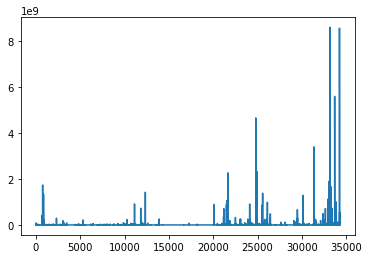

In [17]:
application_df.ASK_AMT.plot()

In [18]:
application_df.ASK_AMT.sort_values(ascending=False)

33175    8597806340
34222    8556638692
33678    5591584994
24795    4653011914
31337    3391919220
            ...    
13293          5000
13292          5000
13291          5000
13290          5000
17149          5000
Name: ASK_AMT, Length: 34299, dtype: int64

<AxesSubplot:>

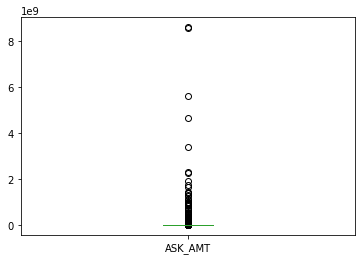

In [19]:
application_df.ASK_AMT.plot(kind='box')

In [20]:
# categorize asked amount to bins
ask_amount_bins = [0, 5000, 15000, 50000, 200000, 500000, 9000000000]
bin_names = ['<5000', '5000-15000', '15000-50000', '50000-200000', '200000-500000', '>500000']
application_df['ask_amount_bins'] = pd.cut(application_df.ASK_AMT, ask_amount_bins, labels=bin_names)
application_df.drop(columns='ASK_AMT', inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL,ask_amount_bins
0,Other,Independent,C1000,ProductDev,Association,1,0,N,1,<5000
1,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,1,50000-200000
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0,<5000
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1,5000-15000
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1,50000-200000


In [21]:
application_df.ask_amount_bins.value_counts()

<5000            25398
50000-200000      2552
>500000           2227
15000-50000       2011
200000-500000     1175
5000-15000         936
Name: ask_amount_bins, dtype: int64

In [22]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   APPLICATION_TYPE        34299 non-null  object  
 1   AFFILIATION             34299 non-null  object  
 2   CLASSIFICATION          34299 non-null  object  
 3   USE_CASE                34299 non-null  object  
 4   ORGANIZATION            34299 non-null  object  
 5   STATUS                  34299 non-null  int64   
 6   INCOME_AMT              34299 non-null  object  
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object  
 8   IS_SUCCESSFUL           34299 non-null  int64   
 9   ask_amount_bins         34299 non-null  category
dtypes: category(1), int64(2), object(7)
memory usage: 2.4+ MB


In [23]:
application_df['ask_amount_bins'] = application_df['ask_amount_bins'].astype('object')

In [24]:
# Encode categorical columns
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(columns=application_cat)
application_df.head()

C:\Users\amhal\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ask_amount_bins_15000-50000,ask_amount_bins_200000-500000,ask_amount_bins_5000-15000,ask_amount_bins_50000-200000,ask_amount_bins_<5000,ask_amount_bins_>500000
0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop('IS_SUCCESSFUL', 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\amhal\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=45))

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                3680      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,141
Trainable params: 6,141
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints",exist_ok=True)
checkpoint_path = "checkpoints/weights_opt.{epoch:02d}.hdf5"

steps_per_epoch = 804

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5*steps_per_epoch)

In [28]:
# Compile the model
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Train the model
fit_model = nn_3.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 6s 6ms/step - loss: 0.5757 - accuracy: 0.7177
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5584 - accuracy: 0.7269
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5553 - accuracy: 0.7302
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5546 - accuracy: 0.7296
Epoch 5/100
795/804 [============================>.] - ETA: 0s - loss: 0.5518 - accuracy: 0.7306
Epoch 5: saving model to checkpoints\weights_opt.05.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5519 - accuracy: 0.7305
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5510 - accuracy: 0.7297
Epoch 7/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5491 - accuracy: 0.7325
Epoch 8/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5483 - accuracy: 0.7332
Epoch 9/100
804/804 [=============================

804/804 [==============================] - 4s 5ms/step - loss: 0.5328 - accuracy: 0.7409
Epoch 65/100
800/804 [============================>.] - ETA: 0s - loss: 0.5332 - accuracy: 0.7410
Epoch 65: saving model to checkpoints\weights_opt.65.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5327 - accuracy: 0.7414
Epoch 66/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5325 - accuracy: 0.7423
Epoch 67/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5321 - accuracy: 0.7409
Epoch 68/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5323 - accuracy: 0.7416
Epoch 69/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5323 - accuracy: 0.7411
Epoch 70/100
801/804 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.7420
Epoch 70: saving model to checkpoints\weights_opt.70.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5319 - accuracy: 0.7422
Epoch 71/100


In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5659 - accuracy: 0.7294 - 625ms/epoch - 2ms/step
Loss: 0.5658723711967468, Accuracy: 0.7294460535049438


In [33]:
# Export  model to HDF5 file
nn_3.save("AlphabetSoupCharity_Optimization.h5")